# Домашняя работа №1


**Набор данных:** Bank Marketing Dataset  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
        
Датасет получен в результате проведения маркетинговой кампании, направленной на привлечение клиентов к созданию банковских вкладов. Всего в опросе участвовало 45211 человек, ответы которых разбиты на 20 признаков. Для каждого опрошенного клиента известна информация по наличию открытого банковского вклада.       

### Работу выполнила: **Харчевникова Ангелина 18 МАГ ИАД**

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [130]:
# Считываем данные из файла
data = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

In [33]:
type(data)

pandas.core.frame.DataFrame

In [34]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
print(data)

       age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       n

In [14]:
# Получим первые default=5 строк
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# Получим последние default=5 строк
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


 ### Bank clients data
 
  
  **Input variables:**
  - age (numeric) - Client age
  - job (categorical) - Type of job: "admin", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self- employed", "services", "student", "technician", "unemployed", "unknown"
  - marital (categorical) - Marital status: "divorced", "married", "single", "unknown"
  - education (categorical) - Education level: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", university.degree", "unknown"
  - default (categorical) - Has credit in default: "no", "yes", "unknown"
  - housing (categorical) - Has housing loan: "no", "yes", "unknown"
  - loan (categorical) - Has personal loan: "no", "yes", "unknown"
 
 **Related with the last contact of the current campaign:***
  - contact (categorical) - Contact communication type: "cellular", "telephone" 
  - month (categorical) - Last contact month of year: "jan", "feb", "mar", ..., "nov", "dec"
  - day_of_week (categorical) - Last contact day of the week: "mon", "tue", "wed", "thu", "fri"
  - duration (numeric) - Last  contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
 
 **Other attributes:**
  - campaign (numeric) - Number of contacts performed during this campaign and for this client
  - pdays (numeric) - Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
  - previous (numeric) - Number of contacts performed before this campaign and for this client 
  - poutcome (categorical) - Outcome of the previous marketing campaign: "failure", "nonexistent", "success"
 
 **Social and economic context attributes**
  - emp.var.rate (numeric) - Employment variation rate 
  - cons.price.idx (numeric) - Consumer price index   
  - cons.conf.idx (numeric) - Consumer confidence index 
  - euribor3m (numeric) - Euribor 3 month rate
  - nr.employed (numeric) - Number of employees

  **Output variable (desired target):**
  - y (binary) - Has the client subscribed a term deposit? "yes", "no"


In [16]:
print(data.shape)
print(data.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [17]:
data.index

RangeIndex(start=0, stop=41188, step=1)

In [21]:
data['job'][0:10]

0      housemaid
1       services
2       services
3         admin.
4       services
5       services
6         admin.
7    blue-collar
8     technician
9       services
Name: job, dtype: object

In [3]:
data.at[2, 'marital']

'married'

In [5]:
data['day_of_week']

0        mon
1        mon
2        mon
3        mon
4        mon
5        mon
6        mon
7        mon
8        mon
9        mon
10       mon
11       mon
12       mon
13       mon
14       mon
15       mon
16       mon
17       mon
18       mon
19       mon
20       mon
21       mon
22       mon
23       mon
24       mon
25       mon
26       mon
27       mon
28       mon
29       mon
        ... 
41158    tue
41159    tue
41160    tue
41161    tue
41162    tue
41163    tue
41164    tue
41165    wed
41166    wed
41167    wed
41168    wed
41169    wed
41170    wed
41171    thu
41172    thu
41173    thu
41174    thu
41175    thu
41176    thu
41177    thu
41178    thu
41179    fri
41180    fri
41181    fri
41182    fri
41183    fri
41184    fri
41185    fri
41186    fri
41187    fri
Name: day_of_week, Length: 41188, dtype: object

In [6]:
data['day_of_week'][11293]

'thu'

In [7]:
type(data['day_of_week'][11293])

str

In [8]:
type(data['day_of_week'])

pandas.core.series.Series

In [10]:
data[['day_of_week','month']].head()

,day_of_week,month
0,mon,may
1,mon,may
2,mon,may
3,mon,may
4,mon,may


In [14]:
# Описательная статистика для числовых значений
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


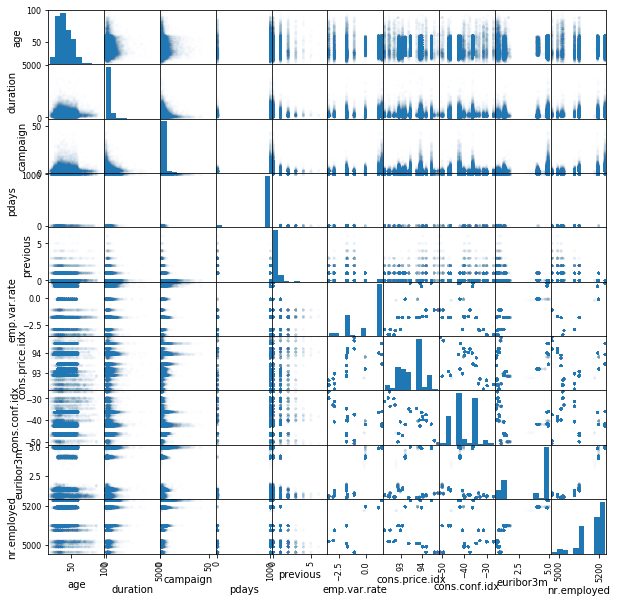

In [4]:
# Рассмотрим матрицу рассеяния, которая показывает, коррелируют ли переменные между собой
# Построим матрицу для каждой пары признаков
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [17]:
# Рассмотрим корреляцию численных признаков
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


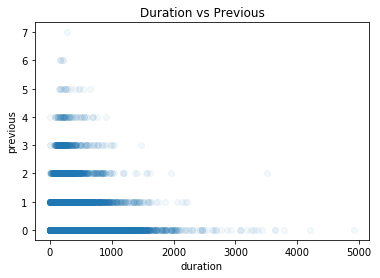

In [37]:
# Рассмотрим количество предыдущих контактов для данного клиента и длительность телефонного опроса 
plt.plot(data['duration'], data['previous'], 'o', alpha = 0.05)
plt.xlabel('duration')
plt.ylabel('previous')
plt.title('Duration vs Previous')
pass

In [11]:
data['age'] >= 30

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8        False
9        False
10        True
11       False
12       False
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
41158     True
41159     True
41160     True
41161     True
41162     True
41163     True
41164     True
41165     True
41166     True
41167     True
41168     True
41169     True
41170     True
41171     True
41172     True
41173     True
41174     True
41175     True
41176     True
41177     True
41178     True
41179     True
41180     True
41181     True
41182    False
41183     True
41184     True
41185     True
41186     True
41187     True
Name: age, Length: 41188, dtype: bool

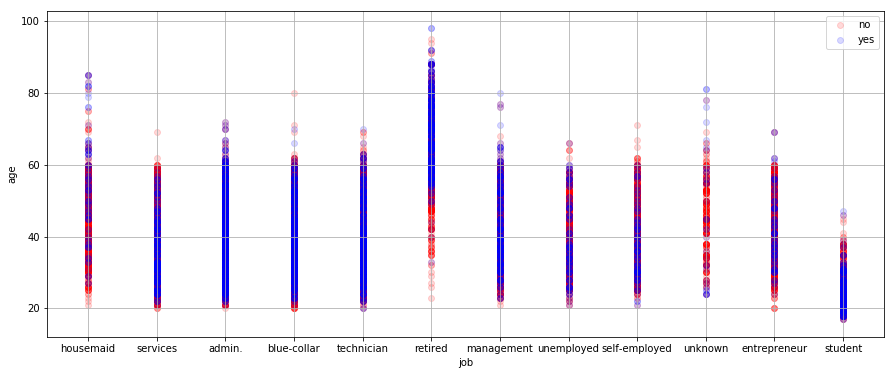

In [4]:
# Рассмотрим количество оформивших и неоформивших банковский депозит клиентов, разбитых по возрасту и их профессии
plt.figure(figsize = (15, 6))
plt.scatter(data[data['y'] == 'no']['job'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')
plt.scatter(data[data['y'] == 'yes']['job'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')
plt.xlabel('job')
plt.ylabel('age')
plt.legend()
plt.grid()

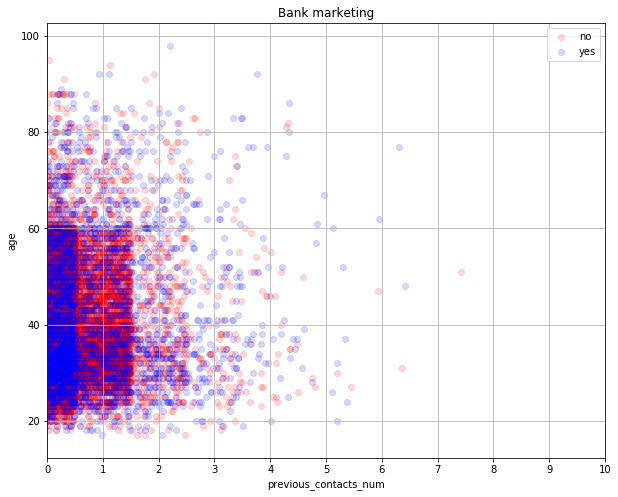

In [5]:
np.random.seed(0)
previous_contacts_num_rnd = data['previous'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(previous_contacts_num_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.scatter(previous_contacts_num_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.xlabel('previous_contacts_num')
plt.xticks(range(11))
plt.xlim(0, 10)
plt.ylabel('age')
plt.title('Bank marketing')
plt.legend()
plt.grid()

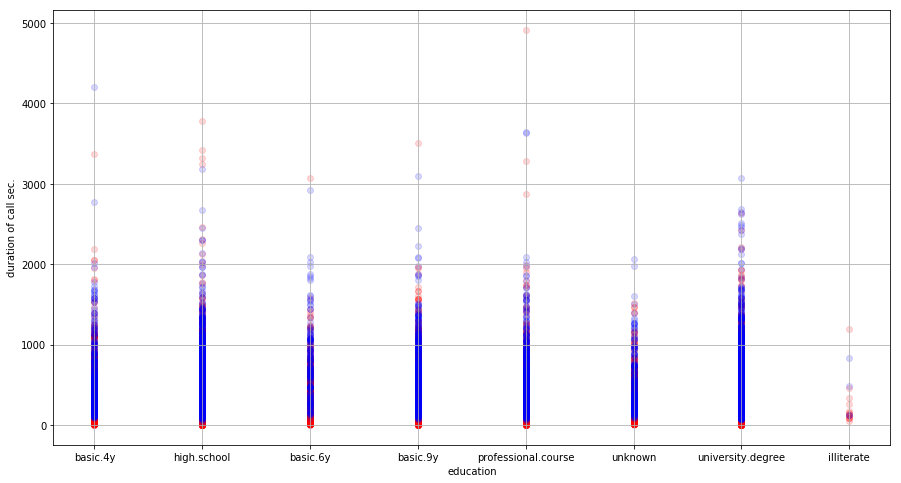

In [6]:
# Зависимость оформления депозита от уровня образования и продолжительности разговора
plt.figure(figsize = (15, 8))

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['duration'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['duration'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.xlabel('education')
plt.ylabel('duration of call sec.')
plt.grid()

In [10]:
# Описательная статистика для категориальных признаков
data.describe(include = ['object'])


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
# Включаем нулевые значения
data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [13]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

## Задача

Целью исследования является стремление повысить эффективность банковской деятельности по привлечению клиентов к оформлению депозитов. С помощью основных факторов, которые влияют на успех кампании, прогнозируют, будет ли открыт банковский вклад. 


Проведем эксперименты с разными наборами признаков в решающей модели.   
Duration (продолжительность телефонного разговора) наиболее влияет на полученный результат. К примеру, если Duration = 0, то очевидно, клиент не оформит депозит, так как изначально откажется от предлагаемой информации.   

Также в датасете присутствуют признаки, которые менее информативны.  
В каждом из экспериментов будут по очереди удаляться некоторые признаки.  



In [131]:
dropped_features = ('duration',)
# dropped_features = ('contact', 'pdays', 'default', 'campaign', 'month')
# dropped_features = ('contact', 'pdays', 'default', 'campaign', 'month', 'day_of_week', 'euribor3m', 'nr.employed', 'cons.price.idx')
# for feature in dropped_features:
#     data = data.drop(feature, axis = 1)

In [132]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Подготовка данных

In [133]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [134]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


## Обработка пропущенных значений

Одной из проблем набора данных является присутствие некоторого количества пропущенных, нулевых значений. Это обусловлено тем, что при проведении телефонного опроса не всегда клиент готов предоставлять полную информацию о себе.

**Решение 1** Удалить пропущенные значения. Тогда данных может стать слишком мало для построения хорошей модели.

**Решение 2** Одной из часто применяемых практик является замена пропущенных величин средним или медианным значением. Данный                 способ и будет применяться при решении поставленной задачи.

In [135]:
data.median(axis = 0)

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

In [136]:
# 'unknown' = nan
data = data.replace('unknown', np.nan)

In [137]:
# Заполняем значения 'NA/NaN' медианным значением
data = data.fillna(data.median(axis = 0), axis = 0)

In [138]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [139]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [140]:
data[numerical_columns].count(axis = 0)

age               41188
duration          41188
campaign          41188
pdays             41188
previous          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
dtype: int64

In [141]:
data[categorical_columns].count(axis = 0)

job            40858
marital        41108
education      39457
default        32591
housing        40198
loan           40198
contact        41188
month          41188
day_of_week    41188
poutcome       41188
y              41188
dtype: int64

In [142]:
# Заполняем категориальные признаки медианным значением
data['job'] = data['job'].fillna('admin.')

In [143]:
data['education'].describe()

count                 39457
unique                    7
top       university.degree
freq                  12168
Name: education, dtype: object

In [144]:
data.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [145]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [146]:
data_describe

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [147]:
data[categorical_columns].count(axis = 0)

job            41188
marital        41188
education      41188
default        41188
housing        41188
loan           41188
contact        41188
month          41188
day_of_week    41188
poutcome       41188
y              41188
dtype: int64

## Векторизация

In [148]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['default', 'housing', 'loan', 'contact', 'y'] ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']


In [149]:
#data['contact'].unique()

In [86]:
# data.at[data['contact'] == 'telephone', 'contact'] = 0
# data.at[data['contact'] == 'cellular', 'contact'] = 1
# data.contact.describe()

In [150]:
# Все категориальные значения (с двумя ответами) заменяем на бинарные
for b_coll in binary_columns[0:len(binary_columns)-1]:
    u_data = data[b_coll].unique()
    data.at[data[b_coll] == u_data[0], b_coll] = 0
    data.at[data[b_coll] == u_data[1], b_coll] = 1
    

In [151]:
data.housing.describe()

count    41188.000000
mean         0.547878
std          0.497708
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: housing, dtype: float64

In [152]:
data.default.unique()

array([0, 1], dtype=int64)

### Применяем метод Векторизации для небинарных признаков

In [153]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [154]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [155]:
data_nonbinary

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## Нормализация количественных признаков

In [156]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [157]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [158]:
data_numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533016,0.010471,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
1,1.628973,-0.421495,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
2,-0.290182,-0.124518,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
3,-0.002309,-0.413782,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
4,1.533016,0.187886,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
5,0.477480,-0.232510,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
6,1.820889,-0.460064,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
7,0.093649,-0.159230,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
8,-1.537633,0.469436,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
9,-1.441675,-0.803323,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676


In [159]:
data_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.009196e-16,-3.795266e-18,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01


## Объединение в одну таблицу

In [160]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(41188, 54)


In [161]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default,housing,loan,contact
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.009196e-16,-3.795266e-18,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11,...,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.000073,0.547878,0.151695,0.634748
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.008534,0.497708,0.358729,0.481507
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X и Y

In [162]:
# Для того, чтобы быстрее проходил подбор параметров и хватило мощности машины, рандомно выделим подмножество данных
# Однако это может повлиять на точность результата

sub_data = data.sample(n=3000, random_state = 1)
data = sub_data

In [163]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = data['y'] # значение, которое предсказываем
feature_names = X.columns

In [164]:
feature_names

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'default', 'housing', 'loan', 'contact'],
      dtype='

In [165]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3000, 53)
(3000,)


In [166]:
# Рандомно делим датасет на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2100 900


In [167]:
28831+12357

41188

 ## $k$ NN ##

In [168]:
# Метод к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)

# Применяем модель с использованием X_train в качестве данных обучения и y_train в качестве целевых значений
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [169]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [170]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0880952380952381 0.10444444444444445


In [171]:
err_test

0.10444444444444445

In [173]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[770  18]
 [ 76  36]]




При проведении нескольких экспериментов с наборами признаков получились следующие результаты:


| Признаки                               |      err_train      |       err_test      | 
|--------------------------------------- |:-------------------:|:-------------------:|
| All                                    | 0.0822              |         0.097       |  
| without ('contact',                    |                                         
|'pdays', 'default', 'campaign',         | 0.09535             |         0.105       |    
| 'month')                               |      0.0828         |      0.09905        |
| without ('contact', 'pdays','default', |                                          
| 'campaign', 'month', 'day_of_week',    |                                          
|  'euribor3m', 'nr.employed',           |                                         
| 'cons.price.idx')                      | 0.0845              |         0.1         |  

    
    
    
#### Таким образом, меньшей ошибки удалось достигнуть при включении всех признаков в решающую модель.

## Подбор параметров

Метод кросс-валидации, который применяется для оптимизации классификатора

In [174]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10142857142857142 15


#### Лучшим числом соседей для алгоритма **$k$NN** является 45 - полная выборка и 15 - 3000 рандомных строк из датасета

In [175]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.08857142857142856 0.1


## SVC

In [176]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.08285714285714285 0.09222222222222222


## Подбор параметров

In [178]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.09952380952380957 1000.0


In [179]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.08857142857142856 0.1
[[770  18]
 [ 76  36]]


#### Высокая ошибка второго рода (отказ от депозита, как согласие)

## Random Forest

In [181]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.09888888888888889
[[770  18]
 [ 76  36]]


#### На тренировочной ошибка равна 0, при этом на тестовой значительно больше -> переобучение

### Значимость признаков

In [182]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [183]:
np.sum(rf.feature_importances_)

1.0000000000000004

In [184]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'duration' (0.228867)
 2. feature 'euribor3m' (0.108738)
 3. feature '  age' (0.075077)
 4. feature 'nr.employed' (0.058906)
 5. feature 'cons.conf.idx' (0.038615)
 6. feature 'emp.var.rate' (0.036904)
 7. feature 'campaign' (0.034408)
 8. feature 'cons.price.idx' (0.031798)
 9. feature 'pdays' (0.029746)
10. feature 'housing' (0.018358)
11. feature 'poutcome_success' (0.017947)
12. feature 'previous' (0.014543)
13. feature 'marital_married' (0.014179)
14. feature 'contact' (0.013755)
15. feature 'education_university.degree' (0.013609)
16. feature 'marital_single' (0.013425)
17. feature 'job_admin.' (0.013150)
18. feature 'day_of_week_thu' (0.012168)
19. feature 'day_of_week_tue' (0.011796)
20. feature 'day_of_week_mon' (0.011445)
21. feature 'job_technician' (0.011180)
22. feature 'day_of_week_fri' (0.011108)
23. feature ' loan' (0.010838)
24. feature 'education_high.school' (0.010676)
25. feature 'day_of_week_wed' (0.010388)
26. feature 'poutcome_nonexis

In [185]:
feature_names[[1,0,1]]

Index(['duration', 'age', 'duration'], dtype='object')

(-1, 20)

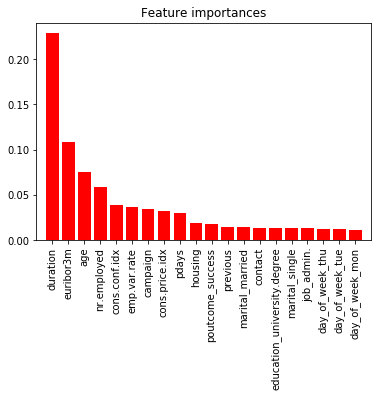

In [186]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

#### Duration признак оказался наиболее значительным

## Extremely Randomized Trees

In [187]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.11
[[770  18]
 [ 76  36]]


#### Переобучение, так как большая разница между тренировочными и тестовыми ошибками

## AdaBoost

In [188]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.045714285714285714 0.09444444444444444
[[770  18]
 [ 76  36]]


## GBT

In [189]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.09222222222222222
[[770  18]
 [ 76  36]]


## Выводы:
#### При включении всех признаков в модель большинство алгоритмов показали переобучение. Достаточно хорошие результаты показали методы k-ближайших соседей и SVC с ошибками на тестовой выборке 0.097 и 0.099 соответственно. При этом метод k-ближайших соседей был также протестирован на полном датасете с ~41 тыс. строк